In [41]:
pip install opencv-python


In [67]:
import cv2
imagepath="input_image.jpg"

In [69]:
img=cv2.imread(imagepath)

In [71]:
img.shape

(1280, 720, 3)

In [73]:
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [75]:
gray_image.shape

(1280, 720)

In [77]:
#pre trained Haar Cascade classifier 
face_classifier=cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [79]:
face=face_classifier.detectMultiScale(
    gray_image,scaleFactor=1.1,minNeighbors=5,minSize=(40,40)
)

In [80]:
for(x,y,w,h) in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)

In [81]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 719.5, 1279.5, -0.5)

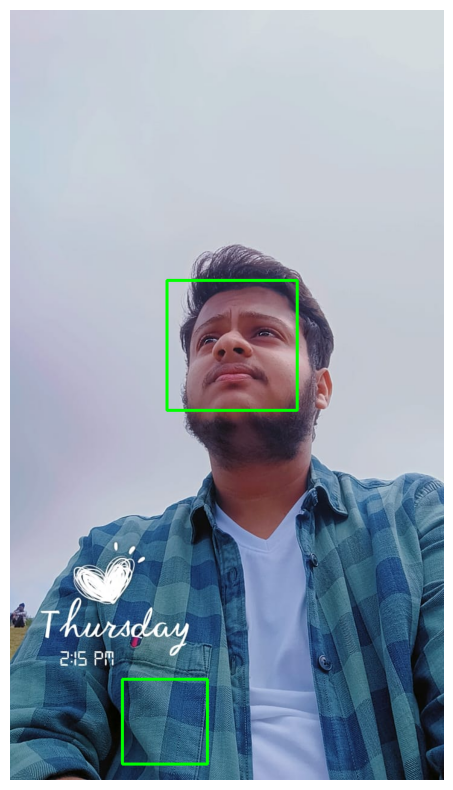

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [ ]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [89]:
video_capture = cv2.VideoCapture(0)

In [95]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [ ]:
while True:
    result,video_frame=video_capture.read()
    if result is False:
        break;
    faces=detect_bounding_box(video_frame)
    cv2.imshow("My face detection Project", video_frame)
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
video_capture.release()
cv2.destroyAllWindows()